In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split

2023-03-19 09:41:24.813980: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read data from cement concrete.csv and look the headers
#alat = pd.read_csv('./data/pero.csv',header=0, index_col = 0, usecols= ['ra','rb','xa','xb','za','a','b','c'])
alat = pd.read_csv('./data/pero.csv')
alat.head()

,sn,compound,ra,rb,xa,xb,za,a,b,c
0,1,BaCeO3,1.35,0.87,0.89,1.12,2.0,6.2350,8.7810,6.2120
1,2,BaPrO3,1.35,0.85,0.89,1.13,2.0,6.2140,8.7220,6.1810
2,3,BaPuO3,1.35,0.86,0.89,1.30,2.0,6.1930,8.7440,6.2190
3,4,CaCrO3,1.00,0.55,1.00,1.66,2.0,5.3160,7.4860,5.2870
4,5,CaGeO3,1.00,0.53,1.00,2.01,2.0,5.2688,7.4452,5.2607


In [3]:
# Information of alat DataFrame
#alat.info()

In [4]:
import numpy as np
features = np.array(alat[['ra','rb','xa','xb','za']], np.float32)
#targets = np.array(alat[['a', 'b', 'c']], np.float32)
targets = np.array(alat[['a']], np.float32)

In [5]:
# Normalization of data between -1 to 1
max_ = features.max(axis=0)
min_ = features.min(axis=0)
features = (features - min_) / (max_ - min_)
targets = (targets - min_) / (max_ - min_)

In [6]:
# Create training and validation splits
X_train, X_valid, y_train, y_valid = train_test_split(features, targets,
                                                    random_state=1113,
                                                    test_size=0.2)

In [7]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=100, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [8]:
# Build a Sequential Model with Droupout and BatchNormalization
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[5]),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

2023-03-19 09:41:44.306490: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 09:41:44.307439: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
# Compile model
model.compile(optimizer='adam', loss='mae',)

In [10]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,
)

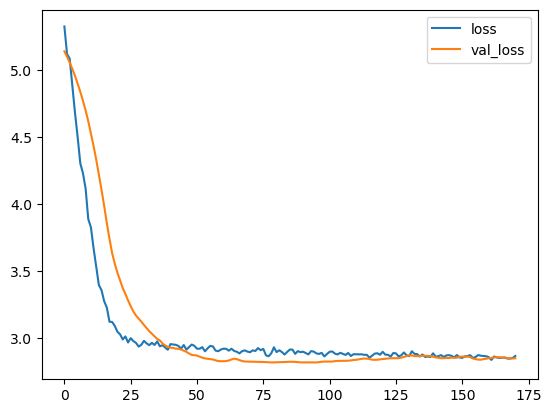

In [11]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [12]:
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 2.8158252239227295


In [34]:
def plotGraph(y_test,y_pred):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    #plt.title(regressorName)
    plt.show()
    return

In [36]:
y_pred = model.predict(X_train)

3/3 [==============================] - 0s 11ms/step


In [37]:
plotGraph(y_pred,X_train)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()